# **Scikit-Learn 기반 분류**

In [1]:
# 사용할 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **이진 분류 (Binary Classification)**

### **이진 분류 Dataset 불러오기**


In [2]:
from sklearn import datasets

In [3]:
data = datasets.load_breast_cancer(as_frame=True)

In [4]:
type(data)

sklearn.utils._bunch.Bunch

### 독립변수 및 종속변수 할당

In [5]:
x, y = data.data, data.target

#### 독립변수 Column 확인

In [6]:
input_feat = x.columns
print(input_feat)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [7]:
print(f"Number of Input Features : {len(input_feat)}")

Number of Input Features : 30


In [8]:
x.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### 종속변수 데이터 확인

In [9]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


##### 종속 변수 (Target Data) (True / False) 비율 확인

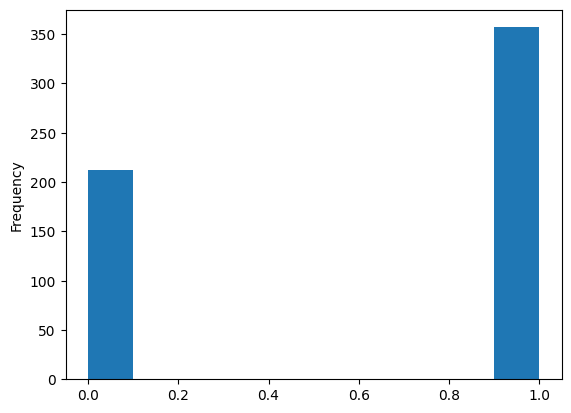

In [10]:
y.plot.hist()
plt.show()

## **데이터 전처리 진행**

### Min-Max Normalization 진행

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
x, y = np.array(x), np.array(y) # Numpy Array 자료 구조로 변환

#### 독립변수 전처리 진행

In [13]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(x)
x = mm_scaler.transform(x) # MIn-Max Normalization 적용

## **Dataset 샘플링 진행**

### Scikit-Learn의 **train_test_split** 활용

In [14]:
from sklearn.model_selection import train_test_split

#### Dataset을 나누는 비율과 Shuffling후 일정한 결과를 얻기 위한 Seed 입력

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


## **로지스틱 회귀 기반 이진 분류**

### Scikit-Learn의 **LogisticRegression** 활용

In [17]:
from sklearn.linear_model import LogisticRegression



1.   Class Instance 생성
2.   fit() Method 실행
3.   predict() Method 실행



In [18]:
lg_reg = LogisticRegression(max_iter=10000, random_state=42)
lg_reg.fit(x_train, y_train)
y_test_hat = lg_reg.predict(x_test)

### **Logistic Regression의 정량적 평가 진행**

#### Scikit-Learn의 **metrics** 활용

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##### **정확도 계산**

In [20]:
acc_score = accuracy_score(y_test, y_test_hat)
print(f"Logistic Reg. Acc. : {acc_score*100:.4f}%")

Logistic Reg. Acc. : 97.6608%


##### **혼돈 행렬 계산**

In [21]:
cm = confusion_matrix(y_test, y_test_hat)
print(cm)

[[ 59   4]
 [  0 108]]


##### **전반적인 평가 지표 계산**

In [22]:
cls_report = classification_report(y_test, y_test_hat)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        63
           1       0.96      1.00      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



## **의사 결정 트리 기반 이진 분류**

### Scikit-Learn의 **DecisionTreeClassifier** 활용

In [23]:
from sklearn.tree import DecisionTreeClassifier



1.   Class Instance 생성
2.   fit() Method 실행
3.   predict() Method 실행



In [24]:
dt_cls = DecisionTreeClassifier(random_state=42)
dt_cls.fit(x_train, y_train)
y_test_hat = dt_cls.predict(x_test)

### **입력 피처 (독립변수) 중요도 확인**

#### Seaborn 라이브러리 활용

In [25]:
import seaborn as sns

In [26]:
def vis_importances(data:pd.Series) :
  plt.figure(figsize=(8,6))
  plt.title("Feature Importances")
  plt.xlabel("Importance")
  plt.ylabel("Feature")
  sns.barplot(x=data, y=data.index)
  plt.show()

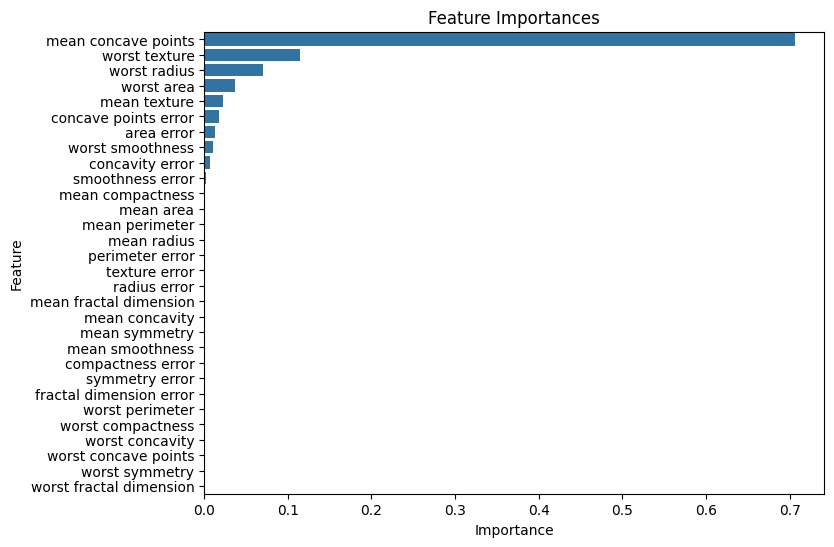

In [27]:
vis_importances(pd.Series(dt_cls.feature_importances_, index=input_feat).sort_values(ascending=False))

#### **Decision Tree의 Component 시각화**

In [28]:
from sklearn.tree import plot_tree

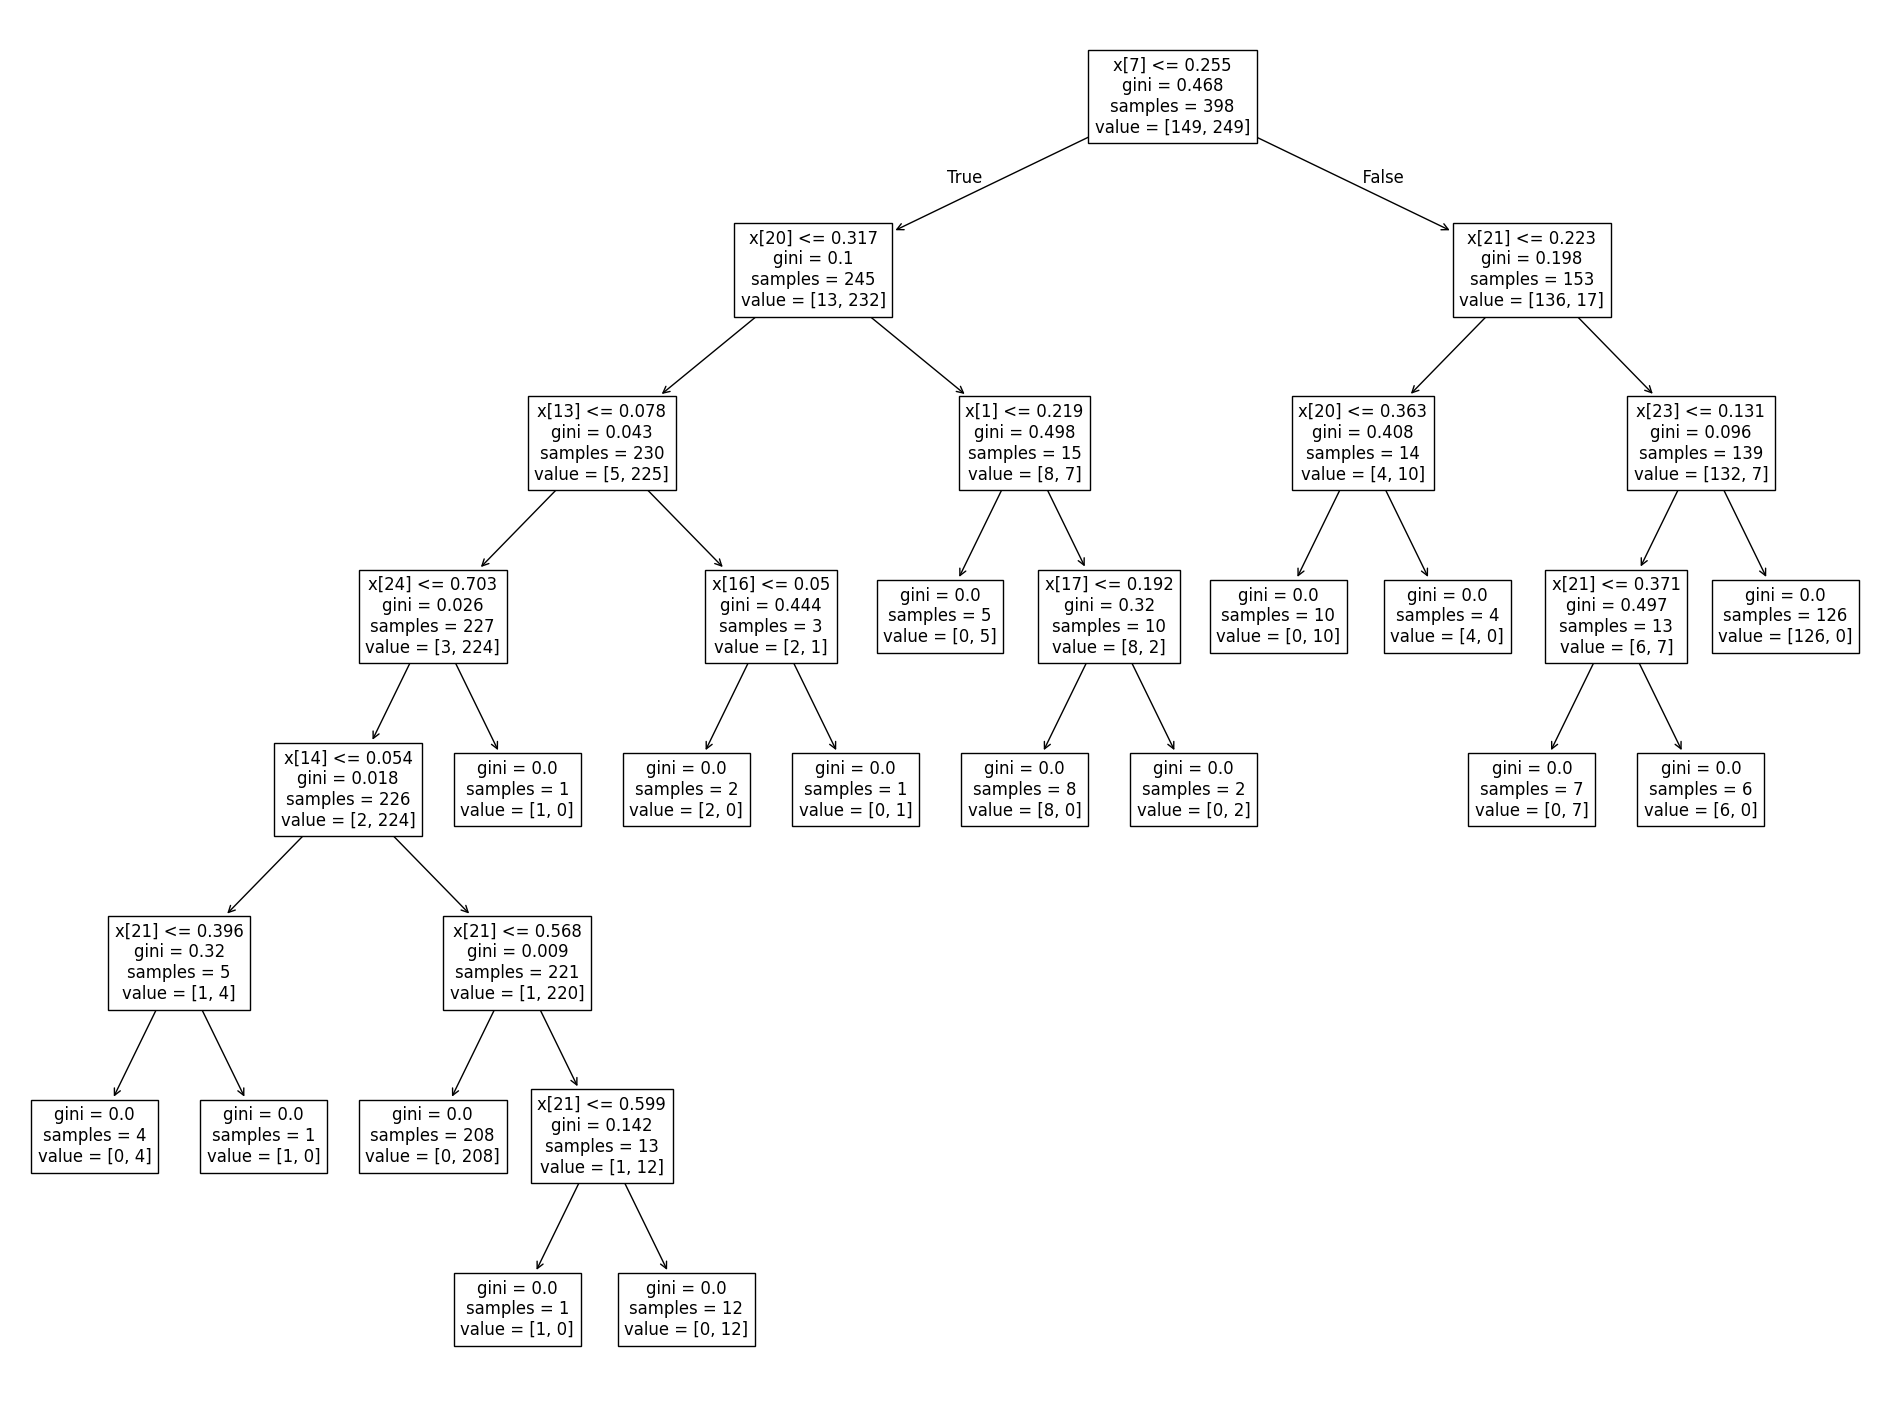

In [29]:
plt.figure(figsize=(24,18))
plot_tree(dt_cls)
plt.show()

### **Decision Tree Classifier의 정량적 평가 진행**

##### **정확도 계산**

In [30]:
acc_score = accuracy_score(y_test, y_test_hat)
print(f"Decision Tree Cls. Acc. : {acc_score*100:.4f}%")

Decision Tree Cls. Acc. : 94.1520%


##### **혼돈 행렬 계산**

In [31]:
cm = confusion_matrix(y_test, y_test_hat)
print(cm)

[[ 60   3]
 [  7 101]]


##### **전반적인 평가 지표 계산**

In [32]:
cls_report = classification_report(y_test, y_test_hat)
print(cls_report)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## **Random Forest 기반 이진 분류**

### Scikit-Learn의 **RandomForestClassifier** 활용

In [33]:
from sklearn.ensemble import RandomForestClassifier



1.   Class Instance 생성
2.   fit() Method 실행
3.   predict() Method 실행



In [34]:
rf_cls = RandomForestClassifier(random_state=42)
rf_cls.fit(x_train, y_train)
y_test_hat = rf_cls.predict(x_test)

### **입력 피처 (독립변수) 중요도 확인**

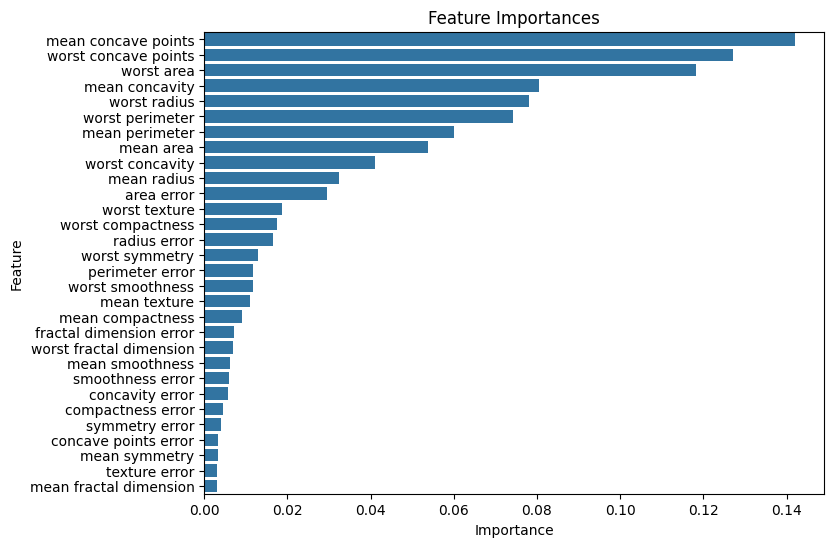

In [35]:
vis_importances(pd.Series(rf_cls.feature_importances_, index=input_feat).sort_values(ascending=False))

### **Random Forest Classifier의 정량적 평가 진행**

##### **정확도 계산**

In [36]:
acc_score = accuracy_score(y_test, y_test_hat)
print(f"Random Forest Cls. Acc. : {acc_score*100:.4f}%")

Random Forest Cls. Acc. : 97.0760%


##### **혼돈 행렬 계산**

In [37]:
cm = confusion_matrix(y_test, y_test_hat)
print(cm)

[[ 59   4]
 [  1 107]]


##### **전반적인 평가 지표 계산**

In [38]:
cls_report = classification_report(y_test, y_test_hat)
print(cls_report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## **다중 클래스 분류 (Multi Class Classification)**

### **다중 클래스 분류 Dataset 불러오기**


#### **Label Encoding 용 데이터**


In [40]:
df = pd.read_csv("/content/Dry_Bean_Dataset.csv")

In [41]:
df.shape

(13611, 17)

In [42]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


## **데이터 전처리 진행**

### Target Data 추출 과정 진행

In [43]:
x = df.drop(columns = "Class", axis = 1)
y = df["Class"]

In [44]:
print(y)

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object


#### 독립변수 Column 확인

In [45]:
input_feat = x.columns
print(input_feat)

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


In [46]:
print(f"Number of Input Features : {len(input_feat)}")

Number of Input Features : 16


#### 독립변수 전처리 진행

In [47]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(x)
x = mm_scaler.transform(x)

#### 종속변수 (Target) 전처리 진행

##### Scikit-Learn의 **LabelEncoder** 활용

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
y

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


In [50]:
label_enc = LabelEncoder()
label_enc.fit(y)
y = label_enc.transform(y)

In [51]:
y

array([5, 5, 5, ..., 3, 3, 3])

## **Dataset 샘플링 진행**

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [53]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(9527, 16) (9527,)
(4084, 16) (4084,)


## **Random Forest 기반 다중 클래스 분류**

In [54]:
rf_cls = RandomForestClassifier(random_state=42)
rf_cls.fit(x_train, y_train)
y_test_hat = rf_cls.predict(x_test)

### **입력 피처 (독립변수) 중요도 확인**

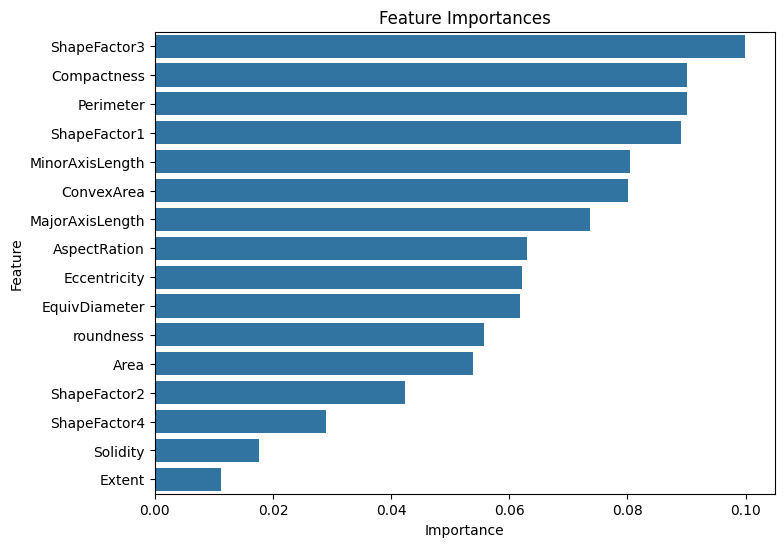

In [55]:
vis_importances(pd.Series(rf_cls.feature_importances_, index = input_feat).sort_values(ascending=False))

### **Random Forest Classifier의 정량적 평가 진행**

In [56]:
acc_score = accuracy_score(y_test, y_test_hat)
print(acc_score)

0.9226248775710089


In [57]:
cm = confusion_matrix(y_test, y_test_hat)
print(cm)

[[355   0  27   0   1   2  10]
 [  0 161   0   0   0   0   0]
 [ 19   0 446   0   9   2   3]
 [  0   0   0 967   2  18  56]
 [  2   0   9   4 560   0  13]
 [  4   0   0  24   0 578  13]
 [  0   0   1  74   9  14 701]]


In [58]:
cls_report = classification_report(y_test, y_test_hat)
print(cls_report)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       395
           1       1.00      1.00      1.00       161
           2       0.92      0.93      0.93       479
           3       0.90      0.93      0.92      1043
           4       0.96      0.95      0.96       588
           5       0.94      0.93      0.94       619
           6       0.88      0.88      0.88       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



### **다중 클래스 분류 Dataset 불러오기**


#### **Label Encoding 및 One-Hot Encoding 용 데이터**


In [59]:
df = pd.read_csv("/content/drug200.csv")

In [60]:
df.shape

(200, 6)

In [61]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## **데이터 전처리 진행**

### Target Data 추출 과정 진행

In [62]:
x = df.drop(columns="Drug", axis=1)
y = df["Drug"]

In [63]:
print(y)

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object


#### 독립변수 Column 확인

In [64]:
input_feat = x.columns
print(input_feat)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')


In [65]:
print(f"Number of Input Features : {len(input_feat)}")

Number of Input Features : 5


#### 독립변수 전처리 진행 (One-Hot Encode)

In [66]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [67]:
one_hot_sex = pd.get_dummies(x["Sex"])
one_hot_bp = pd.get_dummies(x["BP"])
one_hot_cls = pd.get_dummies(x["Cholesterol"])

In [68]:
x.drop(columns = ["Sex", "BP", "Cholesterol"], axis=1, inplace=True)

In [69]:
x = pd.concat([x, one_hot_sex, one_hot_bp, one_hot_cls], axis=1)

In [70]:
x

,Age,Na_to_K,F,M,HIGH,LOW,NORMAL,HIGH,NORMAL
0,23,25.355,True,False,True,False,False,True,False
1,47,13.093,False,True,False,True,False,True,False
2,47,10.114,False,True,False,True,False,True,False
3,28,7.798,True,False,False,False,True,True,False
4,61,18.043,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...
195,56,11.567,True,False,False,True,False,True,False
196,16,12.006,False,True,False,True,False,True,False
197,52,9.894,False,True,False,False,True,True,False
198,23,14.020,False,True,False,False,True,False,True


#### 종속변수 (Target) 전처리 진행

In [71]:
y

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [72]:
y

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [73]:
label_enc = LabelEncoder()
label_enc.fit(y)
y = label_enc.transform(y)

## **Dataset 샘플링 진행**

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [75]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(140, 9) (140,)
(60, 9) (60,)


## **Random Forest 기반 다중 클래스 분류**

In [76]:
rf_cls = RandomForestClassifier(random_state=42)
rf_cls.fit(x_train, y_train)
y_test_hat = rf_cls.predict(x_test)

### **Random Forest Classifier의 정량적 평가 진행**

In [77]:
acc_score = accuracy_score(y_test, y_test_hat)
print(acc_score)

1.0


In [78]:
cm = confusion_matrix(y_test, y_test_hat)
print(cm)

[[26  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]


In [79]:
cls_report = classification_report(y_test, y_test_hat)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



## **교차 검증 (Cross Validation)**

### Scikit-Learn의 **cross_val_score** 활용

In [80]:
from sklearn.model_selection import cross_val_score

### **5-Fold** Cross Validation 진행

In [81]:
acc_score = cross_val_score(rf_cls, x, y, cv = 5)

#### 5번의 결과를 표시

In [82]:
for i, sub_score in enumerate(acc_score) :
  print(f"Part{i+1} Accuracy : {sub_score:.4f}")

Part1 Accuracy : 1.0000
Part2 Accuracy : 1.0000
Part3 Accuracy : 1.0000
Part4 Accuracy : 0.9000
Part5 Accuracy : 1.0000


In [83]:
print(f"Average Score : {np.mean(acc_score):.4f}")

Average Score : 0.9800


# **[ Scikit-Learn 기반 다중 클래스 분류 개인 실습 ]**

## Scikit-Learn의 Digits Dataset을 기반으로 Multi Class Classification을 진행하세요. (10분 소요)



1.   Dataset를 불러온 후 Min-Max Scailing을 진행하세요.
2.   분류 모델로는 Decision Tree와 Random Forest를 사용한 후 성능을 비교하세요. (전체 데이터셋 사용 → 훈련 및 시험 데이터셋 분할 X)
3.   Random Forest 모델을 기반으로 4-Fold Cross Validation을 진행하세요.


In [ ]:
data = datasets.load_digits(as_frame=True)

In [ ]:
# 코드를 작성해주세요